In [ ]:
!pip install torch_nightly -f https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html 

!pip install fastai 

# import libraries 

import fastai 

from fastai import * 

from fastai.text import *  

from functools import partial 

import io 

import os 

Looking in links: https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html
     |████████████████████████████████| 704.8 MB 5.6 kB/s 


In [ ]:
!pip install contractions
!pip install datasets
# !pip install pytorch_lightning
!pip install transformers

import tensorflow as tf
import torch

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional

import pandas as pd
import numpy as np
import re
import string
import math
import contractions
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download("stopwords")
nltk.download("wordnet")

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

import pandas as pd
import numpy as np

from tqdm.auto import tqdm

# import torch
# import torch.nn as nn
# from torch.utils.data import Dataset, DataLoader

# from transformers import BertTokenizerFast as BertTokenizer, BertModel, AdamW, get_linear_schedule_with_warmup

# import pytorch_lightning as pl
# from torchmetrics.functional import accuracy, f1_score, auroc
# from pytorch_lightning.callbacks import ModelCheckpoint, EarlyStopping
# from pytorch_lightning.loggers import TensorBoardLogger

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, multilabel_confusion_matrix

from pylab import rcParams
from matplotlib import rc
import seaborn as sns
import matplotlib.pyplot as plt
import os



%matplotlib inline
%config InlineBackend.figure_format='retina'

     |████████████████████████████████| 287 kB 5.4 MB/s 
     |████████████████████████████████| 106 kB 46.0 MB/s 
     |████████████████████████████████| 325 kB 5.2 MB/s 
     |████████████████████████████████| 212 kB 50.5 MB/s 
     |████████████████████████████████| 1.1 MB 31.9 MB/s 
     |████████████████████████████████| 136 kB 49.7 MB/s 
     |████████████████████████████████| 77 kB 6.9 MB/s 
     |████████████████████████████████| 127 kB 34.2 MB/s 
     |████████████████████████████████| 144 kB 52.6 MB/s 
     |████████████████████████████████| 271 kB 35.3 MB/s 
     |████████████████████████████████| 94 kB 2.0 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium

     |████████████████████████████████| 4.0 MB 5.5 MB/s 
     |████████████████████████████████| 880 kB 39.2 MB/s 
     |████████████████████████████████| 6.6 MB 33.5 MB/s 
     |████████████████████████████████| 596 kB 36.9 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=d570bd5d2630e889c32eee230131020cfb0cf601dbfe629fad260c23d963e2d1
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sacremoses
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
def preprocess(text):

  text=contractions.fix(text) # expanding the contractions
  text=text.lower() # lowering the text
  text=re.sub(r'[^\w\s]', '', text) # removing the punctuation
  text=''.join([i for i in text if not i.isdigit()]) # removing the digits and words containing the digits
  text=" ".join([word for word in str(text).split() if word not in stop_words]) # removing the stopwords
  text=" ".join([lemmatizer.lemmatize(word) for word in text.split()]) # lemmatizing the words

  return text



In [ ]:
# from datasets import load_dataset

# dataset = load_dataset("ethos", "multilabel")
from google.colab import drive
drive.mount("/content/gdrive")

df=pd.read_csv('/content/gdrive/MyDrive/train.csv')

Mounted at /content/gdrive


In [ ]:
# df=pd.DataFrame(data=dataset)
# df1=[]
# for i in df['train']:
#     df1.append(i)

# df=pd.DataFrame(df1)
# df
df=df.drop('id',axis=1)
df=df.rename(columns=({'comment_text':"text"}))
df

,text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,And it looks like it was actually you who put ...,0,0,0,0,0,0


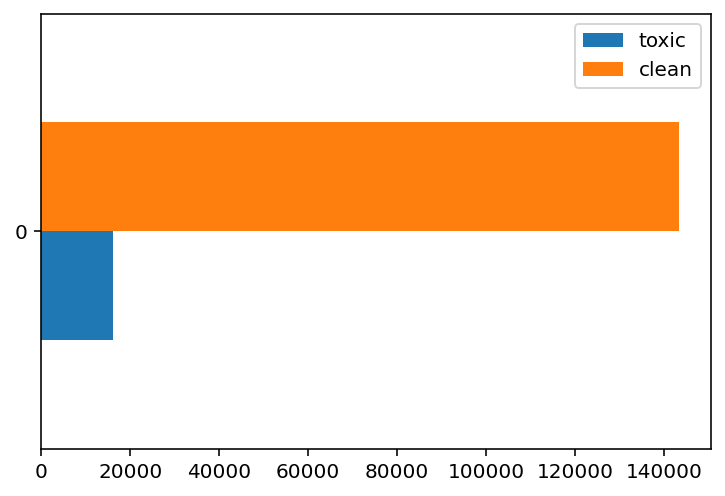

In [ ]:
LABEL_COLUMNS = df.columns.tolist()[1:]
df_toxic = df[df[LABEL_COLUMNS].sum(axis=1) > 0]
df_clean = df[df[LABEL_COLUMNS].sum(axis=1) == 0]

pd.DataFrame(dict(
  toxic=[len(df_toxic)], 
  clean=[len(df_clean)]
)).plot(kind='barh');

In [ ]:
df_clean=df_clean[:8000]
df_toxic=df_toxic[:8000]
df = df_toxic.append(df_clean, ignore_index=True)
df

,text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
1,Hey... what is it..\n@ | talk .\nWhat is it......,1,0,0,0,0,0
2,"Bye! \n\nDon't look, come or think of comming ...",1,0,0,0,0,0
3,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1
4,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0
...,...,...,...,...,...,...,...
15995,"""\nThis isn't """"based off of"""" a Cure song. So...",0,0,0,0,0,0
15996,and the largest - the 1996 swing was smaller t...,0,0,0,0,0,0
15997,November 2008 \n\nThank you for experimenting ...,0,0,0,0,0,0
15998,"Many thanks, Jack. So soothing and refreshing!",0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2,random_state=19)

In [ ]:
type(train)

pandas.core.frame.DataFrame

In [ ]:
type(test)

pandas.core.frame.DataFrame

In [ ]:
pd.concat([train['text'],test['text']]).to_csv( 

    'unlabeled_data.csv', index=None, header=True)

In [ ]:
train[['text', 'toxic','severe_toxic','obscene','threat','insult','identity_hate']].to_csv( 

    'train.csv', index=None, header=True) 

In [ ]:
test[['text']].to_csv('test.csv', index=None, header=True) 

In [ ]:
folder = '.' 

unlabeled_file = 'unlabeled_data.csv' 


In [ ]:
data_lm = TextLMDataBunch.from_csv(folder, unlabeled_file, text_cols='text') 

/usr/local/lib/python3.7/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(a, dtype=dtype, **kwargs)


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.78E-02
Min loss divided by 10: 1.26E-02


0.017782794100389226

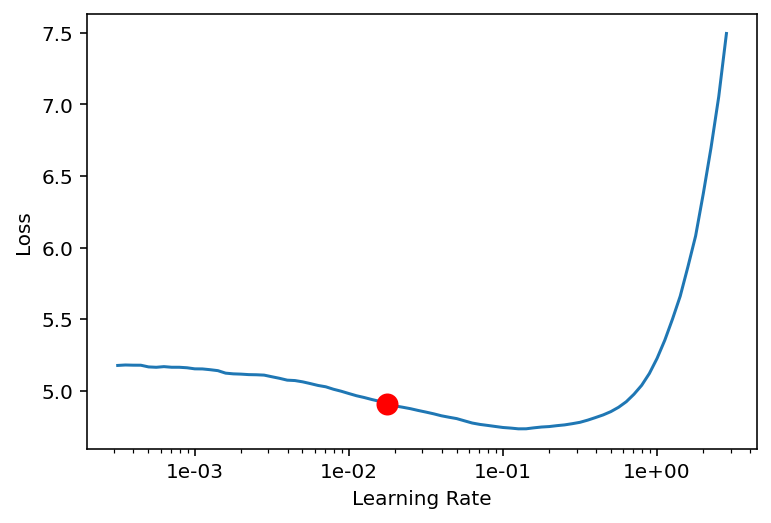

In [ ]:
learn = language_model_learner(data_lm, drop_mult=0.3, arch=AWD_LSTM) 



learn.lr_find(start_lr = slice(10e-7, 10e-5), end_lr=slice(0.1, 10)) 

learn.recorder.plot(skip_end=10, suggestion=True) 

best_lm_lr = learn.recorder.min_grad_lr 

best_lm_lr 

In [ ]:
learn.fit_one_cycle(1, best_lm_lr) 

learn.unfreeze() 

epoch,train_loss,valid_loss,accuracy,time
0,4.149108,3.907639,0.299263,02:02


In [ ]:
learn.fit_one_cycle(1, best_lm_lr) 

learn.predict('toxic comments', n_words=200) 

learn.save_encoder('toxic_enc') 

epoch,train_loss,valid_loss,accuracy,time


In [ ]:
train_file, test_file = 'train.csv', 'test.csv' 

data_clas = TextClasDataBunch.from_csv(path=folder,  

                                        csv_name=train_file, 

                                        test=test_file, 

                                        vocab=data_lm.train_ds.vocab,  

                                        bs=64, 

                                        text_cols='text',  

                                        label_cols=['toxic','severe_toxic','obscene','threat','insult','identity_hate']) 

/usr/local/lib/python3.7/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(a, dtype=dtype, **kwargs)


/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sort_idx = np.concatenate(np.random.permutation(ck_idx[1:])) if len(ck_idx) > 1 else np.array([],dtype=np.int)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


epoch,train_loss,valid_loss,time


/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sort_idx = np.concatenate(np.random.permutation(ck_idx[1:])) if len(ck_idx) > 1 else np.array([],dtype=np.int)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 5.01E-02
Min loss divided by 10: 5.01E-02


0.05011872336272726

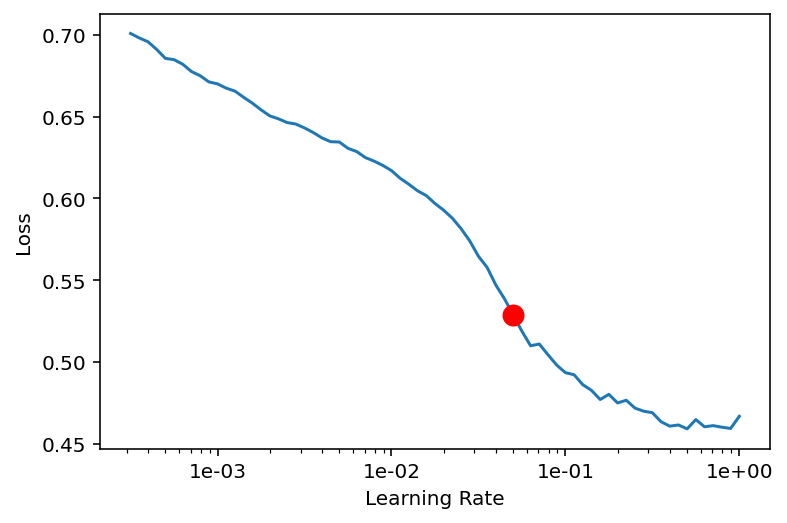

In [ ]:
data_clas.save('ulmfit_data_clas_toxic') 

learn_clas = text_classifier_learner(data_clas, drop_mult=0.3, arch=AWD_LSTM) 

learn_clas.load_encoder('toxic_enc') 

learn_clas.lr_find(start_lr=slice(10e-7, 10e-5), end_lr=slice(0.1, 10)) 

learn_clas.recorder.plot(skip_end=10, suggestion=True) 

best_clf_lr = learn_clas.recorder.min_grad_lr 

best_clf_lr 

In [ ]:
learn_clas.fit_one_cycle(2, best_clf_lr) 

learn_clas.freeze_to(-2) 

learn_clas.fit_one_cycle(2, best_clf_lr) 

learn_clas.show_results()

epoch,train_loss,valid_loss,time
0,0.272440,0.240957,00:51
1,0.234913,0.232841,01:00


/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sort_idx = np.concatenate(np.random.permutation(ck_idx[1:])) if len(ck_idx) > 1 else np.array([],dtype=np.int)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must

epoch,train_loss,valid_loss,time
0,0.239046,0.199149,01:01
1,0.194804,0.192208,01:13


/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sort_idx = np.concatenate(np.random.permutation(ck_idx[1:])) if len(ck_idx) > 1 else np.array([],dtype=np.int)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must

text,target,prediction
"xxbos "" \n \n \n xxup mongo , tell us . xxup why xxup did xxup you xxup do xxup wtc ? xxmaj why xxup mongo ? xxup mongo , tell us . xxup why xxup did xxup you xxup do xxup wtc ? xxmaj why xxup mongo ? xxup mongo , tell us . xxup why xxup did xxup you xxup do xxup wtc ? xxmaj why xxup",toxic,toxic
xxbos xxup xxunk xxup is a xxup nigger xxup xxunk xxup is a xxup nigger xxup xxunk xxup is a xxup nigger xxup xxunk xxup is a xxup nigger xxup xxunk xxup is a xxup nigger xxup xxunk xxup is a xxup nigger xxup xxunk xxup is a xxup nigger xxup xxunk xxup is a xxup nigger xxup xxunk xxup is a xxup nigger xxup xxunk xxup is a xxup,toxic;insult;identity_hate,toxic;severe_toxic;obscene;insult;identity_hate
xxbos 7 > xxup stop xxup editing xxup my xxup posts xxup dipshit \n i xxup have a xxup right xxup to xxup state xxup my xxup opinion xxup and i xxup dont xxup give a xxup shit xxup what xxup you xxup consider xxup vandalism xxup you xxup worthless xxup admin xxup power xxup trip xxup piece xxup of xxup shit \n \n xxup stop xxup editing,toxic,toxic;obscene;insult
xxbos xxmaj user : xxmaj edgar181 is a shit . \n xxmaj user : xxmaj edgar181 is a shit . \n xxmaj user : xxmaj edgar181 is a shit . \n xxmaj user : xxmaj edgar181 is a shit . \n xxmaj user : xxmaj edgar181 is a shit . \n xxmaj user : xxmaj edgar181 is a shit . \n xxmaj user :,toxic;obscene;insult,toxic;obscene;insult
xxbos xxmaj go fuck yourself ! xxmaj go fuck yourself ! xxmaj go fuck yourself ! xxmaj go fuck yourself ! xxmaj go fuck yourself ! xxmaj go fuck yourself ! xxmaj go fuck yourself ! xxmaj go fuck yourself ! xxmaj go fuck yourself ! xxmaj go fuck yourself ! xxmaj go fuck yourself ! xxmaj go fuck yourself ! xxmaj go fuck yourself ! xxmaj go fuck yourself,toxic;severe_toxic;obscene;insult,toxic;severe_toxic;obscene;threat;insult


In [ ]:
data_clas.add_test(test["text"]) 

/usr/local/lib/python3.7/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(a, dtype=dtype, **kwargs)


In [ ]:
test_preds, _ = learn_clas.get_preds(DatasetType.Test, ordered=True)

In [ ]:
test_target=test.drop('text',axis=1)
y_true=test_target.to_numpy()
y_true

array([[0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 1],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0],
       [1, 0, 1, 0, 0, 0],
       [1, 0, 1, 0, 0, 0]])

In [ ]:
test_pred_df = pd.DataFrame(test_preds.data.cpu().numpy(), 

                            columns=['toxic','severe_toxic','obscene','threat','insult','identity_hate']) 
test_pred_df

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0.074455,0.000018,0.002103,0.000007,0.007159,0.000427
1,0.969586,0.013255,0.192760,0.003725,0.319554,0.043454
2,0.006897,0.000176,0.002482,0.000317,0.001207,0.000626
3,0.880647,0.005701,0.157042,0.002764,0.331738,0.015132
4,0.923638,0.069197,0.891383,0.001869,0.166668,0.004525
...,...,...,...,...,...,...
3195,0.991565,0.389088,0.986700,0.011047,0.906302,0.048610
3196,0.000819,0.000001,0.000034,0.000151,0.000067,0.000063
3197,0.612663,0.002583,0.154401,0.000262,0.164018,0.001292
3198,0.811854,0.026802,0.255250,0.018052,0.250621,0.012899


In [ ]:
def prob(x):
  if(x>0.1):
    x=1
  else:
    x=0
  return x

test_pred_df['toxic']=test_pred_df['toxic'].apply(lambda x: prob(x))

test_pred_df['severe_toxic']=test_pred_df['severe_toxic'].apply(lambda x: prob(x))

test_pred_df['obscene']=test_pred_df['obscene'].apply(lambda x: prob(x))

test_pred_df['threat']=test_pred_df['threat'].apply(lambda x: prob(x))

test_pred_df['insult']=test_pred_df['insult'].apply(lambda x: prob(x))

test_pred_df['identity_hate']=test_pred_df['identity_hate'].apply(lambda x: prob(x))
test_pred_df

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,1,0,1,0,1,0
2,0,0,0,0,0,0
3,1,0,1,0,1,0
4,1,0,1,0,1,0
...,...,...,...,...,...,...
3195,1,1,1,0,1,0
3196,0,0,0,0,0,0
3197,1,0,1,0,1,0
3198,1,0,1,0,1,0


In [ ]:
y_pred=test_pred_df.to_numpy()
y_pred

array([[0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [1, 0, 1, 0, 1, 0],
       [1, 0, 1, 0, 1, 0]])

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(
    y_true,
    y_pred,
    output_dict=False,
    target_names=['toxic', 'severe_toxic', 'obscene','threat','insult','identity_hate']
))

               precision    recall  f1-score   support

        toxic       0.76      0.98      0.86      1540
 severe_toxic       0.44      0.73      0.55       165
      obscene       0.59      0.95      0.73       844
       threat       0.38      0.62      0.47        50
       insult       0.51      0.95      0.66       770
identity_hate       0.41      0.28      0.33       152

    micro avg       0.62      0.92      0.74      3521
    macro avg       0.51      0.75      0.60      3521
 weighted avg       0.63      0.92      0.74      3521
  samples avg       0.34      0.47      0.38      3521



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
